#### Importing libraries

In [3]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Setting default matplotlib's figure size
# pylab.rcParams['figure.figsize'] = (10.0, 8.0)

#### Reading data using pandas read_csv 

In [4]:
titanic_df = pd.read_csv("./data/train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Columns names
print(list(titanic_df))
print(titanic_df.info())
print(titanic_df.describe())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.0

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


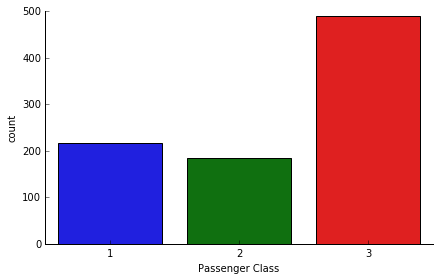

In [10]:
# Grouping number of passengers in each class 
print(titanic_df.groupby('Pclass')['Pclass'].count())
fg = sns.factorplot('Pclass', data=titanic_df,kind='count', aspect=1.5)
fg.set_xlabels('Passenger Class')

Sex
female    314
male      577
Name: Sex, dtype: int64


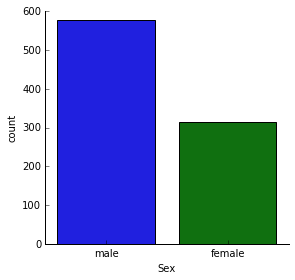

In [14]:
# Counting the number of males and females
print(titanic_df.groupby('Sex')['Sex'].count())
fg = sns.factorplot('Sex',data=titanic_df,kind='count',aspect=1)
fg.set_xlabels('Sex')

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64


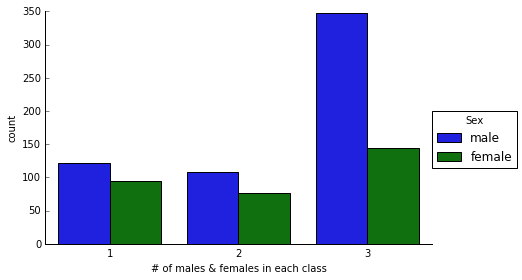

In [16]:
# Number of males and females in each passenger class
print(titanic_df.groupby(['Sex','Pclass'])['Sex'].count())
fg = sns.factorplot('Pclass',data=titanic_df, hue='Sex',kind='count',aspect=1.5)
fg.set_xlabels('# of males & females in each class')

In [18]:
# Number of males and females survived in each class
titanic_df.pivot_table('Survived','Sex','Pclass',aggfunc=np.sum,margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91.0,70.0,72.0,233.0
male,45.0,17.0,47.0,109.0
All,136.0,87.0,119.0,342.0
